In [62]:
#pip install pdf2image
#!pip install opencv-python

In [63]:
import pdf2image
import cv2
from PIL import Image
import PIL
import matplotlib.pyplot as plt

In [64]:
from pdf2image import convert_from_path

pdfs = r"Invoice Copies/2.pdf"
pages = convert_from_path(pdfs, 350)

i = 1
for page in pages:
    image_name = "images/page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1

In [65]:
def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates

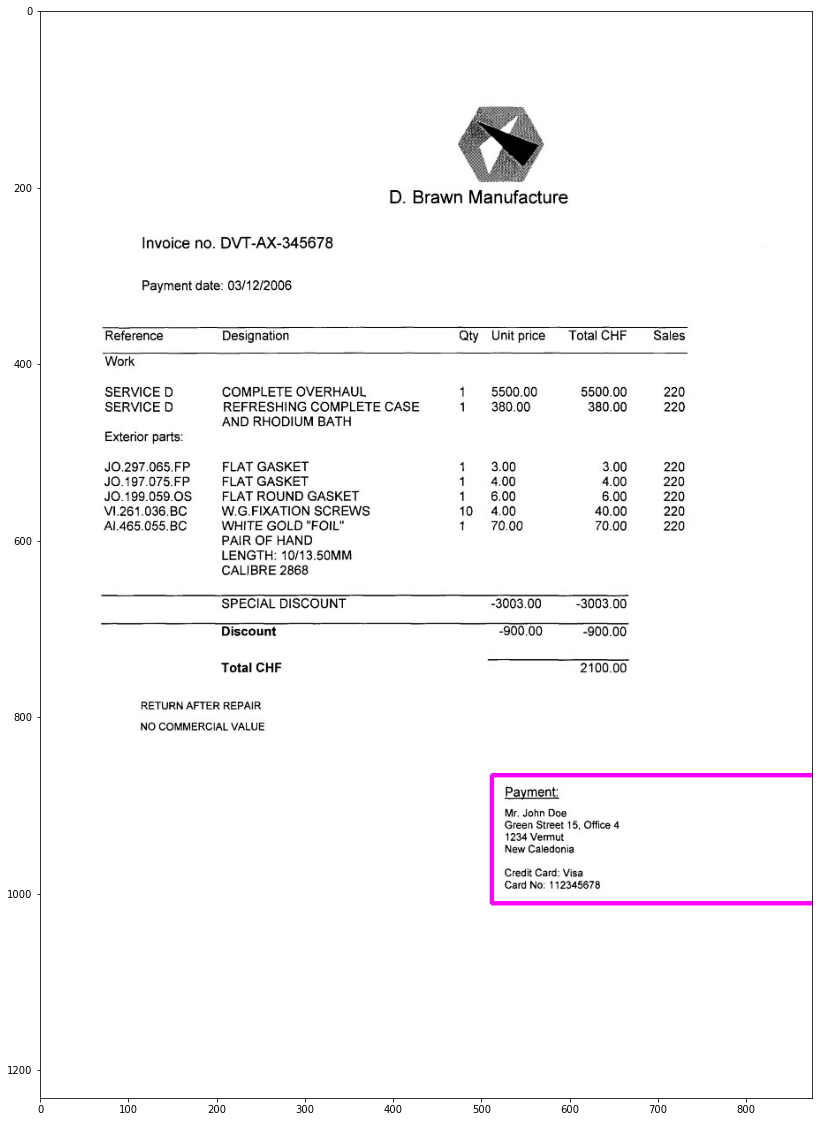

In [66]:
image,lines=mark_region("images/img.jpeg")
plt.figure(figsize=(20,20))
plt.imshow(image)

In [67]:
# image

In [68]:
# lines